# Evaluation Metrics - Pick the Best Performer!

### Importing libraries

In [1]:
import pandas as pd # data handling
import numpy as np  # numerical operations
import joblib       # model loading
import warnings     # to supress warnings

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
warnings.filterwarnings("ignore") # Suppress warnings related to version mismatch

## Loading dataset

We shall be using the iris dataset.

In [3]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Train–Test Split

In [4]:
X = iris.data       # Features (sepal length, sepal width, petal length, petal width)
y = iris.target     # Labels (species: 0,1,2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [5]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Load Pre-trained Models

In [6]:
models = {
    "Decision Tree": joblib.load("model1_decision_tree.pkl"),
    "Logistic Regression": joblib.load("model2_logistic_regression.pkl"),
    "KNN": joblib.load("model3_knn.pkl"),
    "Random Forest": joblib.load("model5_random_forest.pkl"),
    "SVM": joblib.load("model4_svm.pkl")
}

**Check how many input features each pretrained model expects**

This helps verify that the evaluation dataset has the same number of features as the data used during model training, preventing feature mismatch errors

In [7]:
for name, model in models.items():
    print(name, model.n_features_in_)

Decision Tree 4
Logistic Regression 4
KNN 4
Random Forest 4
SVM 4


**Display the shape of the feature matrix**

Confirms the number of samples and features present in the dataset.

The second value (number of columns) must match the model's expected feature count.

In [8]:
X.shape

(150, 4)

## Evaluate Models

In [9]:
results = []

# Tree-based models 
for name in ["Decision Tree", "Random Forest","Logistic Regression", "KNN", "SVM"]:
    model = models[name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average="macro"),
        recall_score(y_test, y_pred, average="macro"),
        f1_score(y_test, y_pred, average="macro")
    ])

## Results Table

In [10]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)

print("\nFINAL MODEL COMPARISON:\n")
print(results_df.sort_values("F1 Score", ascending=False))


FINAL MODEL COMPARISON:

                 Model  Accuracy  Precision    Recall  F1 Score
2  Logistic Regression  0.955556   0.955556  0.955556  0.952381
4                  SVM  0.955556   0.955556  0.955556  0.952381
0        Decision Tree  0.933333   0.937500  0.933333  0.928480
1        Random Forest  0.933333   0.937500  0.933333  0.928480
3                  KNN  0.933333   0.928571  0.929915  0.928480


**Observations**

Among the evaluated models, Logistic Regression and SVM achieved the best performance with an F1-score of approximately 95.2%. Decision Tree, Random Forest and KNN followed closely with strong results. Overall, Logistic Regression and SVM were identified as the top-performing models.

## Visualizing

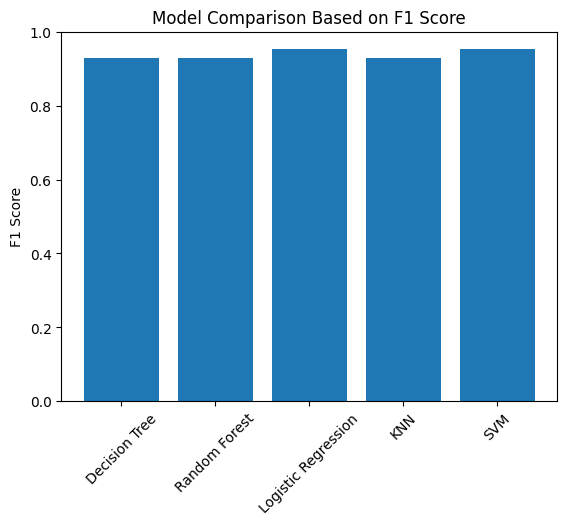

In [11]:
import matplotlib.pyplot as plt

plt.bar(results_df["Model"], results_df["F1 Score"])
plt.xticks(rotation=45)
plt.ylabel("F1 Score")
plt.title("Model Comparison Based on F1 Score")
plt.show()

## Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix

rf_model = models["Logistic Regression"]
y_pred_rf = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[17,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 13]])

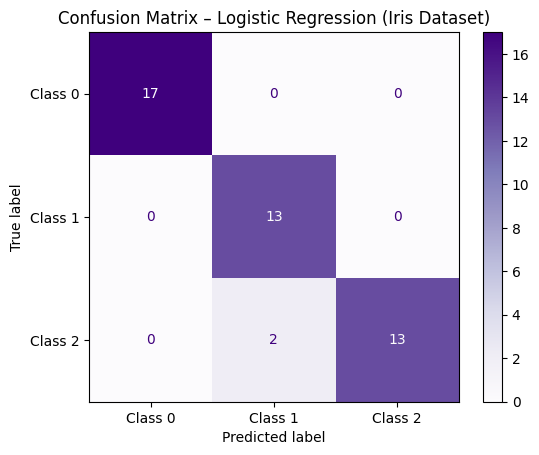

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Class 0", "Class 1", "Class 2"]
)

disp.plot(cmap="Purples")
plt.title("Confusion Matrix – Logistic Regression (Iris Dataset)")
plt.show()


The Iris dataset is a multi-class classification problem with exactly 3 classes:

- Iris Setosa (Class 0)
- Iris Versicolor (Class 1)
- Iris Virginica (Class 2)

Each class corresponds to one row and one column in the confusion matrix.